In [15]:
import os
import numpy as np

# Display
import matplotlib.pyplot as plt
%matplotlib inline

# Librosa 
import librosa
import librosa.display
import IPython.display as ipd

import warnings
warnings.filterwarnings('ignore')

Load audio and sampling rate

In [18]:
audio_file = 'classical.00064.wav'
audio_path = f'../datasets/single_files/{audio_file}'
y, sr = librosa.load(audio_path)
size = len(y)

print('y:', y, '\n')
print('y shape:', size, '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the first audio
print('Check Len of Audio:', size/sr)


y: [ 0.00656128  0.00662231  0.00665283 ... -0.01055908 -0.01025391
 -0.01016235] 

y shape: 661794 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


Time Domain Representation

Text(0.5, 1.0, 'Sound Waves classical.00064.wav')

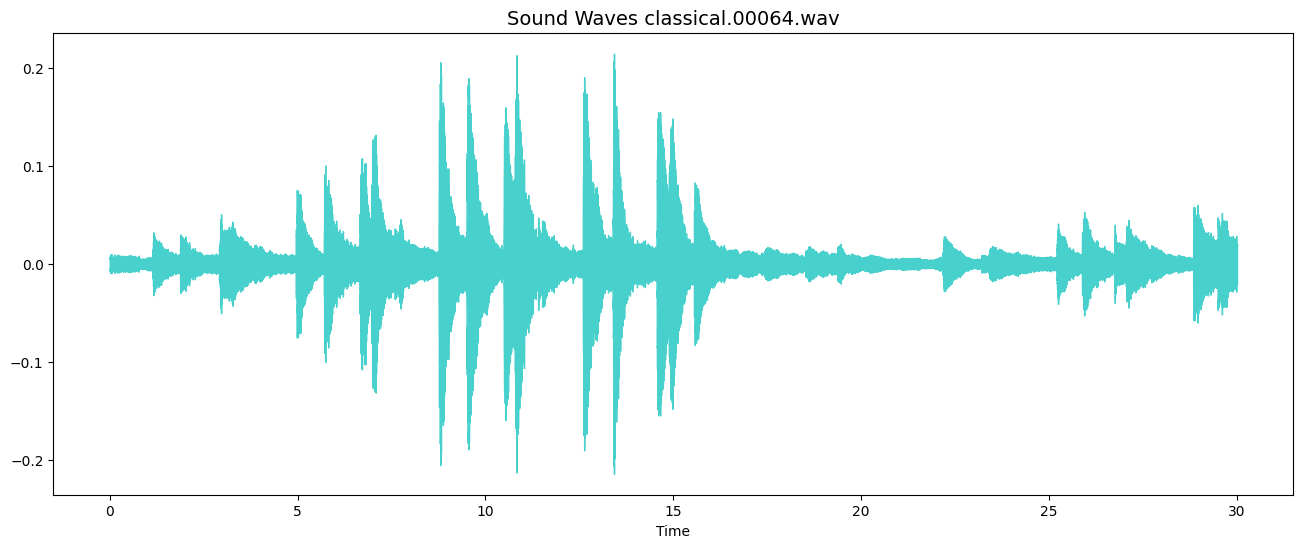

In [19]:
plt.figure(figsize = (16, 6))
audio_file2, _ = librosa.effects.trim(y)
librosa.display.waveshow(y = y, sr = sr, color = "mediumturquoise")
plt.title(f"Sound Waves {audio_file}", fontsize = 14)

Fourier Transform

This function transforms the domain of the input signal from time domain to frequency domain so that we can extract espectral information of the music signal. In the following representation, x-axis and y-axis are represented in log scale (y-axis in decibels, x-axis in log-frequency)?


Text(0, 0.5, 'dB')

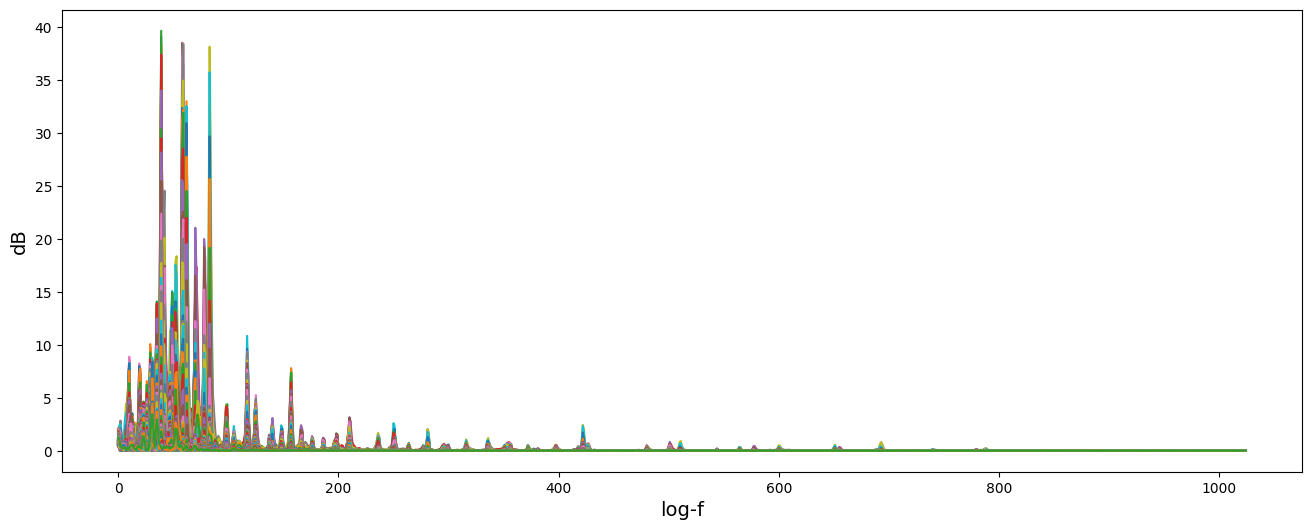

In [20]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(y, n_fft = n_fft, hop_length = hop_length))

plt.figure(figsize = (16, 6))
plt.plot(D)
plt.xlabel('log-f', fontsize = 14)
plt.ylabel('dB', fontsize = 14)

Spectrogram

A spectrogram consists of a 2D representation of the frequency spectrum of the music signal along its duration time. 

Text(0.5, 1.0, 'Spectrogram of classical.00064.wav')

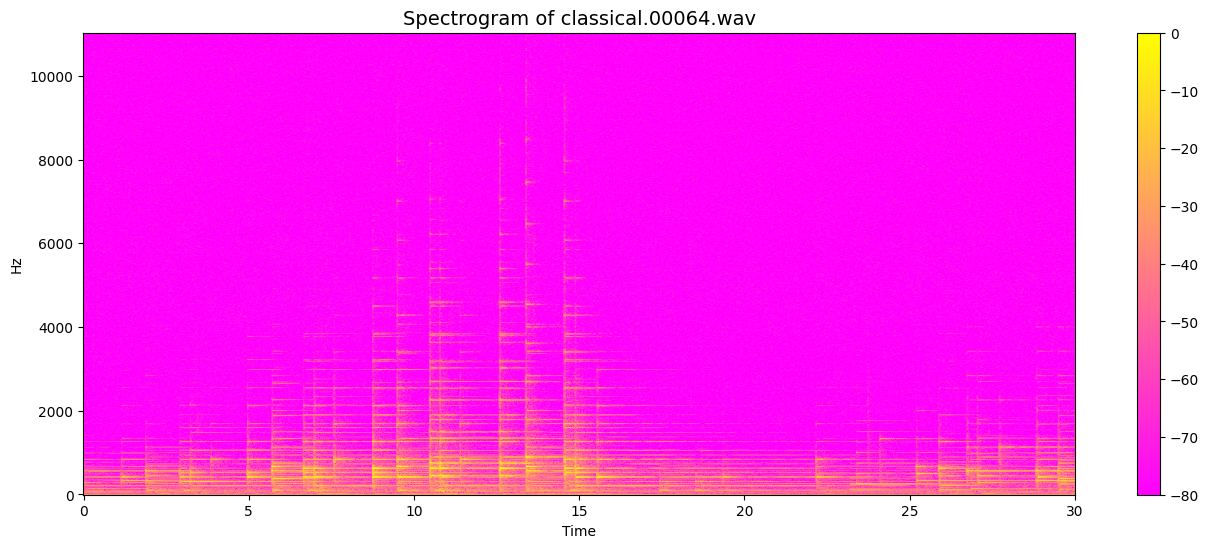

In [21]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'linear',
                        cmap = 'spring')
plt.colorbar()
plt.title(f'Spectrogram of {audio_file}', fontsize=14)